# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys

# Import API key
from api_keys import api_key
# api_key = "YOUR KEY HERE!"

# Incorporated citipy to determine city based on latitude and longitude
!{sys.executable} -m pip install citipy
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL to retrieve weather data
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

# Create lists to hold the cities and weather data
cities_list = []
weather_data = []

# Loop through the list of cities and retrieve the weather data
print("Beginning Data Retrieval ")
print("-----------------------------")

counter = 0
for city in cities:
    counter += 1   
    response = requests.get(query_url + city).json()
    if response.get("id"):
        print("Processing Record " + str(counter) + " | " + city)
        cities_list.append(city)
        weather_data.append(response)
    else:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 | nikolskoye
Processing Record 2 | saskylakh
Processing Record 3 | maragogi
Processing Record 4 | bakel
Processing Record 5 | san patricio
City not found. Skipping...
Processing Record 7 | tuatapere
Processing Record 8 | mataura
Processing Record 9 | hobart
Processing Record 10 | college
Processing Record 11 | tura
Processing Record 12 | anandpur sahib
Processing Record 13 | komsomolskiy
Processing Record 14 | tiksi
City not found. Skipping...
Processing Record 16 | ponta do sol
Processing Record 17 | kieta
Processing Record 18 | salalah
Processing Record 19 | busselton
Processing Record 20 | bodden town
Processing Record 21 | luganville
Processing Record 22 | belmonte
Processing Record 23 | cape town
Processing Record 24 | culfa
Processing Record 25 | ostrovnoy
Processing Record 26 | hamilton
Processing Record 27 | ilulissat
Processing Record 28 | albany
Processing Record 29 | tilichiki
Processing Record 30 | 

Processing Record 252 | chiang mai
Processing Record 253 | baghdad
Processing Record 254 | mocuba
Processing Record 255 | prado
Processing Record 256 | hofn
Processing Record 257 | hay river
Processing Record 258 | talnakh
Processing Record 259 | mattru
Processing Record 260 | puerto madero
Processing Record 261 | pocone
Processing Record 262 | high level
Processing Record 263 | kitimat
City not found. Skipping...
Processing Record 265 | sao lourenco da serra
Processing Record 266 | anadyr
Processing Record 267 | suifenhe
Processing Record 268 | necochea
Processing Record 269 | formosa
City not found. Skipping...
Processing Record 271 | saint-augustin
Processing Record 272 | eston
Processing Record 273 | butaritari
Processing Record 274 | thompson
Processing Record 275 | ternate
Processing Record 276 | bella vista
Processing Record 277 | hasaki
Processing Record 278 | grafton
Processing Record 279 | alofi
Processing Record 280 | takoradi
Processing Record 281 | tombouctou
Processing Re

Processing Record 503 | ladario
Processing Record 504 | lubawa
Processing Record 505 | matagami
Processing Record 506 | pilar
Processing Record 507 | oksfjord
City not found. Skipping...
Processing Record 509 | chaihe
City not found. Skipping...
Processing Record 511 | gerede
Processing Record 512 | gubkinskiy
City not found. Skipping...
Processing Record 514 | isla mujeres
Processing Record 515 | kloulklubed
Processing Record 516 | quang ngai
Processing Record 517 | khorixas
Processing Record 518 | honiara
City not found. Skipping...
Processing Record 520 | garoua
Processing Record 521 | roebourne
Processing Record 522 | zhuhai
Processing Record 523 | ponto novo
Processing Record 524 | ginir
Processing Record 525 | diamantino
Processing Record 526 | ampanihy
Processing Record 527 | chuy
Processing Record 528 | longhua
Processing Record 529 | tonstad
Processing Record 530 | terenos
Processing Record 531 | xingyi
Processing Record 532 | itoman
Processing Record 533 | hailar
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the series for the required weather data
latitude = [data.get("coord").get("lat") for data in weather_data]
temperature = [data.get("main").get("temp") for data in weather_data]
humidity = [data.get("main").get("humidity") for data in weather_data]
cloudiness = [data.get("clouds").get("all") for data in weather_data]
wind_speed = [data.get("wind").get("speed") for data in weather_data]

# Create the summary data frame
weather_py = pd.DataFrame({"City": cities_list,
                           "Latitude": latitude,
                           "Temperature (F)": temperature,
                           "Humidity (%)": humidity,
                           "Cloudiness (%)": cloudiness,
                           "Wind Speed (mph)": wind_speed})

In [5]:
# Output File (CSV)
weather_py.to_csv("cities.csv", encoding = "utf-8", index = False)

# Show data frame
weather_py.head()

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,nikolskoye,59.70,42.80,81,90,17.90
1,saskylakh,71.97,-8.23,64,56,5.37
2,maragogi,-9.01,78.76,87,92,10.51
3,bakel,14.90,87.99,27,32,12.08
4,san patricio,-26.98,79.21,90,100,5.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

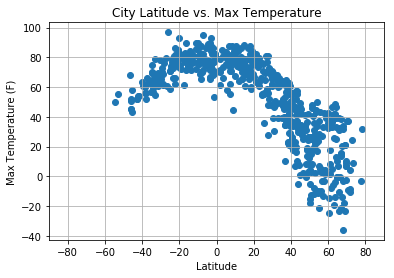

In [10]:
# Build a series of scatter plots
# Temperature (F) vs. Latitude
plt.scatter(weather_py["Latitude"], weather_py["Temperature (F)"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)

# Save figure
plt.savefig("temperature_vs_latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

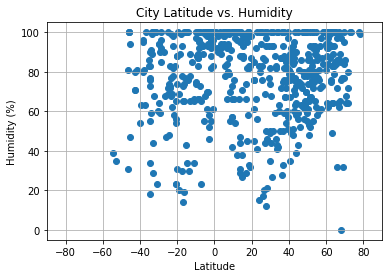

In [11]:
# Build a series of scatter plots
# Humidity (%) vs. Latitude
plt.scatter(weather_py["Latitude"], weather_py["Humidity (%)"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)

# Save figure
plt.savefig("humidity_vs_latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

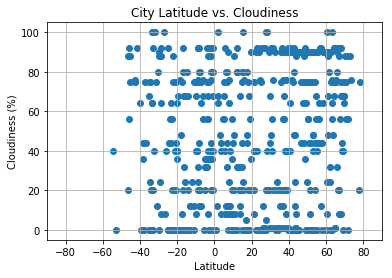

In [12]:
# Build a series of scatter plots
# Cloudiness (%) vs. Latitude
plt.scatter(weather_py["Latitude"], weather_py["Cloudiness (%)"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)

# Save figure
plt.savefig("cloudiness_vs_latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

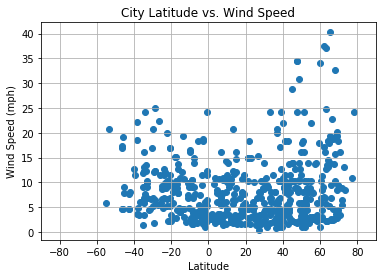

In [13]:
# Build a series of scatter plots
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_py["Latitude"], weather_py["Wind Speed (mph)"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)

# Save figure
plt.savefig("wind_speed_vs_latitude.png")

# Show plot
plt.show()